In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.datasets import load_boston

In [15]:
iris_dataset=load_iris()
print("Ключи load_dataset:\n", iris_dataset.keys())

Ключи load_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [16]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
iris_df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset.feature_names)
display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
dict_class=dict(zip(range(3),iris_dataset['target_names']))
df_full=pd.concat([pd.DataFrame(iris_dataset['target'],columns=['class']), 
                   iris_df], axis=1).replace({'class': dict_class})
df_full.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## Шаг 1. Строим самую простую модель

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

sc_train = knn.score(X_train , y_train)
sc_test = knn.score(X_test , y_test)


print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.964
тестовый: 1.000


## Шаг 2. Проводим препроцессинг (пересмасштабирование) данных

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЦНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

sc_train = knn.score(X_train_scaled , y_train)
sc_test =  knn.score(X_test_scaled ,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.955
тестовый: 1.000


## Шаг 2.5 Посмотрим метрики результатов
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЦНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# предскажем значение тренировочный и тестовых y
y_pred_train=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

# Проверим тренировочный набор (не всегда нужно делать)
print('тренировочный R^2: {:.3f}'.format( r2_score(y_train,y_pred_train) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тренировочный MSE: {:.3f}'.format( mean_squared_error(y_train,y_pred_train) ) ) 

# Проверим тренировочный набор (не всегда нужно делать)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) ) 


тренировочный R^2: 0.957
тренировочный MSE: 0.028
тестовый R^2: 0.991
тестовый MSE: 0.007


## Шаг 3. Добавим поиск оптимального параметра

[1.    0.964 0.955 0.955 0.955 0.955 0.964 0.964 0.955]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


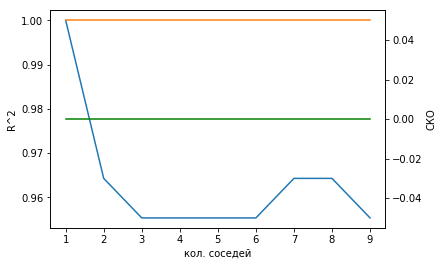

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42) # 1, 12, 100

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

sc_train=[]
sc_test=[]
sc_train_mse=[]
sc_test_mse=[]

ran=range(1,10)

for r in ran:
    knn = KNeighborsClassifier(n_neighbors=r)
    knn.fit(X_train_scaled, y_train)
    sc_train=np.append(sc_train,knn.score(X_train_scaled ,y_train))
    sc_test=np.append(sc_test, knn.score(X_test_scaled ,y_test)) 
    y_pred=knn.predict(X_test_scaled)
    sc_test_mse=np.append(sc_test_mse,  mean_squared_error (y_test, y_pred)   )
    
np.set_printoptions(precision=3)
print(sc_train)
print(sc_test)
print(sc_test_mse)

fig, ax1 = plt.subplots()
ax1.plot(ran,sc_train,ran,sc_test)
ax1.set_xlabel('кол. соседей')
ax1.set_ylabel('R^2')
ax2 = ax1.twinx()
ax2.plot(ran,sc_test_mse,'-g')
ax2.set_ylabel('СКО') #  СКО - среднеквадрат ошибка  или MSE - mean squared error
plt.show()

## Итоговый шаг. Строим коннтейнеры

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, minmax_scale, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42, test_size=0.2)

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 5]
p=[1, 2, 3, 4, 6, 8, 10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer(), QuantileTransformer(), PowerTransformer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'), 'classifier__n_neighbors': 3, 'classifier__p': 2, 'classifier__weights': 'uniform', 'preprocessing': Normalizer(copy=True, norm='l2')}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.983333

Правильность для наилучшей модели на тестовом наборе: 0.966667



,333,285,357,213,345,309,207,351,363,189,...,410,326,302,398,386,122,134,290,146,158
mean_fit_time,0.000205088,0.000417161,0.00121365,0,0.000812173,0.00102389,0.0007936,0,0.00143747,0.0016223,...,0.000806546,0.000801563,0.0032392,0.00184879,0.00125368,0.00304601,0.00328329,0.00123343,0.000206161,0
std_fit_time,0.000615263,0.00122665,0.00159022,0,0.00242438,0.00245351,0.00158726,0,0.00257125,0.0032213,...,0.00241964,0.00240469,0.0028734,0.00322234,0.00245566,0.003568,0.0037639,0.00243391,0.000618482,0
mean_score_time,0.00161133,0.00118394,0.000439906,0.00119996,0.000214195,0.00123737,0.000807095,0.00102718,0.00166354,0.00184493,...,0.00125611,0.00322111,0.00224695,0,0.000813699,0.00161824,0.00183411,0.00184271,0,0
std_score_time,0.00322266,0.00180862,0.000880152,0.00183297,0.000642586,0.00244869,0.00161427,0.00247369,0.00271256,0.0031955,...,0.0024567,0.00394506,0.00304185,0,0.0024411,0.00269252,0.00319796,0.00321499,0,0
param_classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...",...,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_classifier__n_neighbors,4,4,5,3,5,4,3,5,5,3,...,5,4,4,5,5,2,2,4,2,2
param_classifier__p,10,3,2,4,1,6,4,2,3,2,...,10,10,6,8,6,4,6,4,8,10
param_classifier__weights,distance,distance,distance,distance,distance,distance,uniform,uniform,uniform,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')",...,"RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ..."
params,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifie